In [1]:
# Go to website and request API Key.... /api/
# read API documentation to see how to use api

# test code from website to check if connected
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
# Pulling data using my key
    
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '92abb888-77c4-40dc-bf38-f16c1556a585',
}

session = Session()
session.headers.update(headers)

## This will print unreadable data
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
# make the data read better
import pandas as pd

# See all columns 
pd.set_option('display.max_columns', None)

In [5]:
# Normalize data and more readable and assign variable to dataframe
df = pd.json_normalize(data["data"])

# New column to show when data was pulled
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929332e+07,1.929332e+07,NaN,1,None,None,None,2023-02-17T03:09:00.000Z,23812.498768,3.925047e+10,10.7572,-0.028695,-3.645704,8.671521,11.850126,42.751344,43.214786,4.594223e+11,42.3280,5.000625e+11,None,2023-02-17T03:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:11:56.364308+00:00
1,1027,Ethereum,ETH,ethereum,6466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,None,None,None,2023-02-17T03:09:00.000Z,1660.253661,1.190863e+10,4.1546,-0.083808,-1.994410,7.245284,4.827278,40.624627,37.501266,2.031717e+11,18.7188,2.031717e+11,None,2023-02-17T03:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:11:56.364308+00:00
2,825,Tether,USDT,tether,47698,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.015424e+10,7.314177e+10,NaN,3,None,None,None,2023-02-17T03:09:00.000Z,1.000210,5.618526e+10,15.2381,0.002738,0.003050,-0.000920,0.001775,0.003804,0.107251,7.016897e+10,6.4655,7.315712e+10,None,2023-02-17T03:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-17 03:11:56.364308+00:00
3,1839,BNB,BNB,bnb,1191,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578980e+08,1.599800e+08,NaN,4,None,None,None,2023-02-17T03:09:00.000Z,308.993222,9.328540e+08,11.1795,0.281046,-4.007607,0.450288,1.476718,24.384270,13.206380,4.878941e+10,4.4951,6.179864e+10,None,2023-02-17T03:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:11:56.364308+00:00
4,3408,USD Coin,USDC,usd-coin,10134,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.161390e+10,4.161390e+10,NaN,5,None,None,None,2023-02-17T03:09:00.000Z,1.000060,5.324728e+09,12.7765,-0.001095,-0.005966,0.007467,-0.003999,0.025759,-0.019421,4.161641e+10,3.8339,4.161641e+10,None,2023-02-17T03:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-17 03:11:56.364308+00:00
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,None,None,None,2023-02-17T03:09:00.000Z,0.389284,1.147061e+09,0.3135,0.407328,-3.128199,0.797340,-0.544459,13.427227,2.435339,1.977529e+10,1.8221,3.892844e+10,None,2023-02-17T03:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:11:56.364308+00:00
6,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.463515e+10,3.548507e+10,NaN,7,None,None,None,2023-02-17T03:09:00.000Z,0.396659,5.094792e+08,-3.2959,0.595398,-3.495686,9.306622,12.933971,49.004194,22.317252,1.373835e+10,1.2659,1.784967e+10,None,2023-02-17T03:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:11:56.364308+00:00
7,4687,Binance USD,BUSD,binance-usd,6215,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.370625e+10,1.370625e+10,NaN,8,None,None,None,2023-02-17T03:09:00.000Z,1.000245,1.259156e+10,16.3468,0.007876,0.025820,0.010521,0.006789,0.049928,-0.103363,1.370961e+10,1.2632,1.370961e+10,None,2023-02-17T03:09:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-17 03:11:56.364308+00:00
8,3890,Polygon,MATIC,polygon,588,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-know

In [6]:
# Function to run API

def api_runner():
    global df # makes df a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '92abb888-77c4-40dc-bf38-f16c1556a585',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # New dataframe is created then appended to existing dataframe
    df = pd.json_normalize(data["data"])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    pd.concat([df, df], ignore_index=True) 
    
    # Checking if a file path + file name exists
    # create new csv if one does not exist 
    if not os.path.isfile('/Users/lorenmoffitt/Desktop/Data_Learning/projects/API_CoinMarket/API.csv'):
        df.to_csv('/Users/lorenmoffitt/Desktop/Data_Learning/projects/API_CoinMarket/API.csv', 
                  header = 'column_names')
        
    # Appending the existing csv with current data
    else:
        df.to_csv('/Users/lorenmoffitt/Desktop/Data_Learning/projects/API_CoinMarket/API.csv', mode = 'a', 
                 header = False)


In [11]:
# Run the function whenever we want
import os
from time import time
from time import sleep

# I only have 333 runs per day with current API key
for i in range(333):
    api_runner()
    print("Run Complete")
    sleep(60) # run for loop every minute or sleep for 59 seconds, then run on the 60th second.
exit()

Run Complete
Run Complete
Run Complete
Run Complete


KeyboardInterrupt: 

In [15]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.929332e+07,1.929332e+07,NaN,1,None,None,None,2023-02-17T03:20:00.000Z,23855.110934,3.922968e+10,10.4668,0.184381,-3.375506,8.926780,11.748600,42.936417,43.394948,4.602444e+11,42.3485,5.009573e+11,None,2023-02-17T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:21:28.465048+00:00
1,1027,Ethereum,ETH,ethereum,6466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,None,None,None,2023-02-17T03:20:00.000Z,1663.003393,1.190991e+10,3.9709,0.176790,-1.714491,7.487991,4.687754,40.818514,37.638862,2.035082e+11,18.7254,2.035082e+11,None,2023-02-17T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:21:28.465048+00:00
2,825,Tether,USDT,tether,47698,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.015424e+10,7.314177e+10,NaN,3,None,None,None,2023-02-17T03:20:00.000Z,1.000223,5.619220e+10,15.0576,0.000209,0.004331,0.001801,0.007511,0.007821,0.112104,7.016989e+10,6.4584,7.315808e+10,None,2023-02-17T03:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-17 03:21:28.465048+00:00
3,1839,BNB,BNB,bnb,1191,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.578980e+08,1.599800e+08,NaN,4,None,None,None,2023-02-17T03:20:00.000Z,309.504729,9.310593e+08,10.5681,0.412586,-3.815054,0.724078,1.543395,24.647832,13.336682,4.887018e+10,4.4967,6.190095e+10,None,2023-02-17T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:21:28.465048+00:00
4,3408,USD Coin,USDC,usd-coin,10134,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.161390e+10,4.161390e+10,NaN,5,None,None,None,2023-02-17T03:20:00.000Z,1.000188,5.316945e+09,12.3103,0.008941,0.018943,0.032511,0.009123,0.021563,-0.008011,4.162174e+10,3.8296,4.162174e+10,None,2023-02-17T03:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-17 03:21:28.465048+00:00


In [33]:
## Call csv from file and we can manipulate this like any dataframe
dfcsv = pd.read_csv("/Users/lorenmoffitt/Desktop/Data_Learning/projects/API_CoinMarket/API.csv")
dfcsv.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19293000.00000,19293000.00000,NaN,1,NaN,NaN,NaN,2023-02-16T18:21:00.000Z,24890.00771,41321751588.98036,66.06810,0.18783,9.12330,10.24868,17.15262,48.28750,50.06261,480202918755.96960,42.71820,522690161917.54999,NaN,2023-02-16T18:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 18:24:01.622945+00:00
1,1,1027,Ethereum,ETH,ethereum,6465,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-16T18:21:00.000Z,1715.23941,13788581511.35339,85.71660,0.15171,8.49926,5.38521,8.62439,44.63480,42.38254,209900477953.68912,18.66880,209900477953.69000,NaN,2023-02-16T18:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 18:24:01.622945+00:00
2,2,825,Tether,USDT,tether,47686,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,69785731024.84929,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-16T18:21:00.000Z,1.00023,58258475095.23370,59.96910,0.00356,-0.00712,0.00804,0.00858,0.00430,0.10219,69802078700.75618,6.21160,73158900166.13000,NaN,2023-02-16T18:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-16 18:24:01.622945+00:00
3,3,1839,BNB,BNB,bnb,1191,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,157898062.33306,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-16T18:21:00.000Z,320.64045,1012584728.80796,97.61940,-0.11259,5.95046,0.91330,6.07949,28.31476,18.36739,50628505504.52996,4.50300,64128089675.65000,NaN,2023-02-16T18:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 18:24:01.622945+00:00
4,4,3408,USD Coin,USDC,usd-coin,10123,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41560243505.85051,41560243505.85051,NaN,5,NaN,NaN,NaN,2023-02-16T18:21:00.000Z,1.00000,5791281634.56095,59.79910,0.01128,-0.00374,-0.02123,-0.00669,-0.00791,-0.01697,41560248910.05432,3.69710,41560248910.05000,NaN,2023-02-16T18:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-16 18:24:01.622945+00:00


In [17]:
## Transform data
# Change scientific notation to float with 5 decimal points
pd.set_option('display.float_format', lambda x:'%.5f'%x)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19293325.00000,19293325.00000,NaN,1,None,None,None,2023-02-17T03:20:00.000Z,23855.11093,39229684760.63135,10.46680,0.18438,-3.37551,8.92678,11.74860,42.93642,43.39495,460244408152.68353,42.34850,500957329605.26001,None,2023-02-17T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:21:28.465048+00:00
1,1027,Ethereum,ETH,ethereum,6466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,None,None,None,2023-02-17T03:20:00.000Z,1663.00339,11909914736.50943,3.97090,0.17679,-1.71449,7.48799,4.68775,40.81851,37.63886,203508154678.66968,18.72540,203508154678.67001,None,2023-02-17T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:21:28.465048+00:00
2,825,Tether,USDT,tether,47698,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,70154241013.18802,73141766321.23428,NaN,3,None,None,None,2023-02-17T03:20:00.000Z,1.00022,56192202704.36449,15.05760,0.00021,0.00433,0.00180,0.00751,0.00782,0.11210,70169885862.50146,6.45840,73158077408.00999,None,2023-02-17T03:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-17 03:21:28.465048+00:00
3,1839,BNB,BNB,bnb,1191,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,157897997.33600,159979963.59043,NaN,4,None,None,None,2023-02-17T03:20:00.000Z,309.50473,931059280.99166,10.56810,0.41259,-3.81505,0.72408,1.54339,24.64783,13.33668,48870176826.65353,4.49670,61900945738.61000,None,2023-02-17T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-17 03:21:28.465048+00:00
4,3408,USD Coin,USDC,usd-coin,10134,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,41613896679.84906,41613896679.84906,NaN,5,None,None,None,2023-02-17T03:20:00.000Z,1.00019,5316944709.42693,12.31030,0.00894,0.01894,0.03251,0.00912,0.02156,-0.00801,41621736590.86568,3.82960,41621736590.87000,None,2023-02-17T03:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-17 03:21:28.465048+00:00


In [18]:
# group currency by name
# only show certain columns
# display the mean value of each column for each currency
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                   'quote.USD.percent_change_7d',
                                  'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 
                                   'quote.USD.percent_change_90d']].mean()
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.18438,-3.37551,8.92678,11.74860,42.93642,43.39495
Ethereum,0.17679,-1.71449,7.48799,4.68775,40.81851,37.63886
Tether,0.00021,0.00433,0.00180,0.00751,0.00782,0.11210
BNB,0.41259,-3.81505,0.72408,1.54339,24.64783,13.33668
USD Coin,0.00894,0.01894,0.03251,0.00912,0.02156,-0.00801
XRP,0.59006,-2.84577,0.89517,-0.25402,13.87438,2.58308
Cardano,0.84538,-3.25739,9.69491,12.88746,49.31422,22.65068
Binance USD,-0.01660,0.02395,0.01639,-0.01739,0.01016,-0.05200
Polygon,0.08123,3.96967,13.79022,41.36060,77.01008,63.85660


In [19]:
# Change the columns to rows 
# This stacks the data and turns it into a series type
dfstk = df1.stack()
dfstk.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.18438
         quote.USD.percent_change_24h   -3.37551
         quote.USD.percent_change_7d     8.92678
         quote.USD.percent_change_30d   11.74860
         quote.USD.percent_change_60d   42.93642
dtype: float64

In [20]:
type(dfstk)

pandas.core.series.Series

In [21]:
# Convert series type to dataframe type
df2 = dfstk.to_frame(name = 'values')
df2.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.18438
        quote.USD.percent_change_24h -3.37551
        quote.USD.percent_change_7d   8.92678
        quote.USD.percent_change_30d 11.74860
        quote.USD.percent_change_60d 42.93642

In [22]:
type(df2)

pandas.core.frame.DataFrame

In [23]:
# Create index for dataframe
df2.count()

values    60
dtype: int64

In [24]:
index = pd.Index(range(60))

# reset the index for dataframe
df3 = df2.reset_index()
df3.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.18438
1,Bitcoin,quote.USD.percent_change_24h,-3.37551
2,Bitcoin,quote.USD.percent_change_7d,8.92678
3,Bitcoin,quote.USD.percent_change_30d,11.74860
4,Bitcoin,quote.USD.percent_change_60d,42.93642


In [25]:
# Visualize data
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Rename the level_1 column to percent_change
df4 = df3.rename(columns = {'level_1': 'percent_change'})
df4.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.18438
1,Bitcoin,quote.USD.percent_change_24h,-3.37551
2,Bitcoin,quote.USD.percent_change_7d,8.92678
3,Bitcoin,quote.USD.percent_change_30d,11.74860
4,Bitcoin,quote.USD.percent_change_60d,42.93642


In [27]:
# Change the names of each percent_change to shorter name for the vis.
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                      ['1h','24h','7d','30d','60d','90d'])
df4.head()

,name,percent_change,values
0,Bitcoin,1h,0.18438
1,Bitcoin,24h,-3.37551
2,Bitcoin,7d,8.92678
3,Bitcoin,30d,11.74860
4,Bitcoin,60d,42.93642


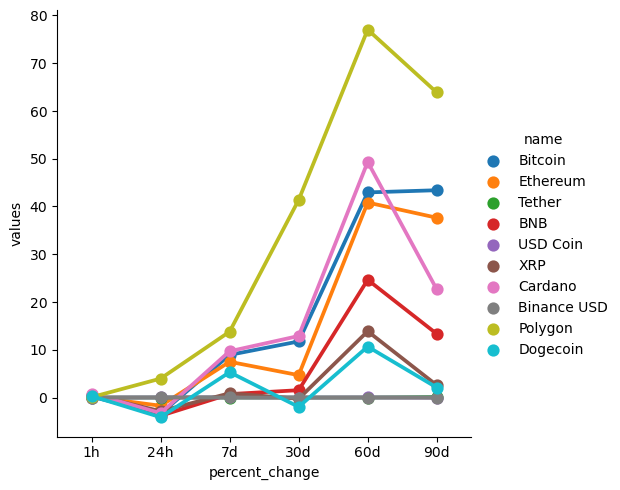

In [28]:
## If you plot the csv data, it will make multiple plots
sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point')
plt.show()

In [49]:
# take only the columns we want
df5 = dfcsv[['name','quote.USD.price','timestamp']]

# watch the qutation marks
df5 = df5.query("name == 'Polygon'")
df5.head()

,name,quote.USD.price,timestamp
8,Polygon,1.45836,2023-02-16 18:24:01.622945+00:00
18,Polygon,1.46200,2023-02-16 18:27:01.307867+00:00
28,Polygon,1.46151,2023-02-16 18:28:01.767369+00:00
38,Polygon,1.46161,2023-02-16 18:29:02.118766+00:00
48,Polygon,1.46161,2023-02-16 18:30:03.014007+00:00


In [54]:
df6 = dfcsv.groupby('name', sort=False)[['quote.USD.price', 'quote.USD.market_cap_dominance']].mean()
df6

,quote.USD.price,quote.USD.market_cap_dominance
name,,
Bitcoin,24506.52111,42.63039
Ethereum,1694.37271,18.69576
Tether,1.00021,6.30794
BNB,316.15019,4.50095
USD Coin,1.00001,3.75032
XRP,0.39620,1.81504
Cardano,0.40313,1.25915
Binance USD,1.00005,1.24473
Polygon,1.43911,1.13359


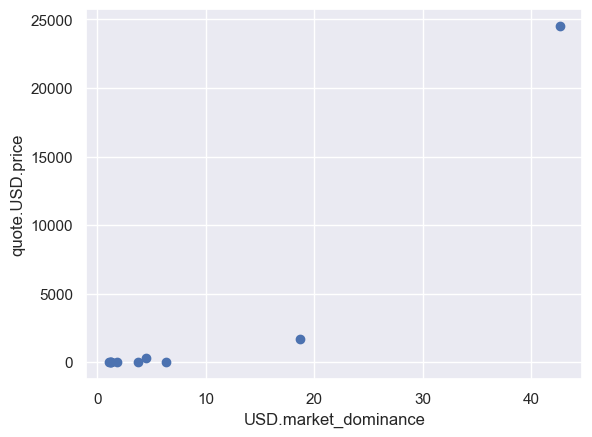

In [71]:
plt.scatter(df6['quote.USD.market_cap_dominance'], df6['quote.USD.price'])
plt.xlabel('USD.market_dominance')
plt.ylabel('quote.USD.price')
plt.show()

In [65]:
# Correlation Matrix
cmat = dfcsv.corr()

In [76]:
# See if correlation can be found 
corr_pairs = cmat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.9] 
high_corr.head(26)
# All shown below have strong correlations

quote.USD.percent_change_7d         quote.USD.percent_change_60d         0.91107
quote.USD.percent_change_60d        quote.USD.percent_change_7d          0.91107
cmc_rank                            platform.id                          0.91766
platform.id                         Unnamed: 0                           0.91766
                                    cmc_rank                             0.91766
Unnamed: 0                          platform.id                          0.91766
quote.USD.price                     quote.USD.market_cap_dominance       0.93879
quote.USD.market_cap_dominance      quote.USD.price                      0.93879
quote.USD.market_cap                quote.USD.price                      0.93893
quote.USD.price                     quote.USD.market_cap                 0.93893
circulating_supply                  total_supply                         0.94536
total_supply                        circulating_supply                   0.94536
quote.USD.percent_change_90d